# EXPLORE Data Science Academy Classification Hackathon
Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government

# **Table of Contents**
1. Data Collection
2.Importing Packages 
2. Data Cleaning 
3. Exploratory data Analysis
4. Model Building
5. Model Deployment

# Data collection 
The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt.

The data is in the form Language ID, Text. The text is in various states of cleanliness. Some NLP techniques will be necessary to clean up the data.

# Importing packages

In [100]:
#pandas and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# tweet cleaning and transformation
import nltk
import re
import string
#import preprocessor as p
import string
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import word_tokenize, pos_tag, pos_tag_sents
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 

# training the model
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# Asssessing the model
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
#resampling module
from sklearn.utils import resample
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


# Loading the data




In [101]:

df = pd.read_csv('sample_submission.csv')
df1_test = pd.read_csv('test_set.csv')
df2_train = pd.read_csv('train_set.csv')


# Data cleaning and transformtion 

In [102]:
df2_train.tail()

,lang_id,text
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999,sot,mafapha a mang le ona a lokela ho etsa ditlale...


In [103]:
df1_test.tail()

,index,text
5677,5678,You mark your ballot in private.
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ..."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ..."
5681,5682,Vakatjhela iwebhusayidi yethu ku-www.


In [104]:
df1_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [105]:
df1_test.isnull().sum() # checking for null values on our test dataset

index    0
text     0
dtype: int64

In [106]:
df2_train.shape# checking size of the trin data

(33000, 2)

In [107]:
df1_test.shape

(5682, 2)

In [108]:
df2_train.info()# checking for non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [109]:
df1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [110]:
type_lang_id = list(df2_train.lang_id.unique())
print(type_lang_id)

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


In [111]:
# Longest and shortest text

length_text = df2_train.text.str.len()

# How long is the longest text?
print("Longest text:", max(length_text))

# How long is the shortest text?
print("Shortest text:",min(length_text))

Longest text: 299
Shortest text: 201


In [112]:
# Longest and shortest text

length_text = df1_test.text.str.len()

# How long is the longest text?
print("Longest text:", max(length_text))

# How long is the shortest text?
print("Shortest text:",min(length_text))

Longest text: 5195
Shortest text: 11


# Cleaning the Data to do more Exploratory Data Analysis:



# Removing noise

In [113]:
df2_train

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [114]:
df1_test

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
...,...,...
5677,5678,You mark your ballot in private.
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ..."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ..."


# We will be removing the url,repeating charts and numbers

In [120]:
def removing_URL(data):
    return re.sub(r"http\s","",data)
def removing_repeating_char(data):
    return re.sub(r'(.)1_',r'1',data)
def removing_numbers(data):
    return re.sub('[0-9]+','',data)

    
    
    data = re.sub('\[.*?\]','',data)
    data = re.sub('<.*?>+','',data)
    data = re.sub('[%s]'% re.escape(string.punctuation),'',data)
    data = re.sub('\w*\d\w*','',data)
    return data
def  clean_data(tokenized_text):
    "clean each word from list of tokenized text"
    tokenized_text = removing_URL( tokenized_text)
    tokenized_text = removing_repeating_char( tokenized_text)
    tokenized_text = removing_numbers( tokenized_text)
    
    return tokenized_text

In [121]:
df2_train['text'] = df2_train['text'].apply(lambda x:clean_data(x))
df1_test['text'] = df1_test['text'].apply(lambda x:clean_data(x))

In [122]:
# make all lower case
df2_train['text'] = df2_train['text'].str.lower()

In [123]:
#remove puntuation
df2_train['text'] = df2_train['text'].apply(lambda x: ''.join([l for l in x if l not in string.punctuation]))
df2_train

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [124]:
#start by tokenizing the text
tokeniser = TreebankWordTokenizer()
df2_train['tokenized'] = df2_train['text'].apply(tokeniser.tokenize)

In [126]:
df2_train.head()

,lang_id,text,tokenized
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulunatal department of tra...,"[the, province, of, kwazulunatal, department, ..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


# Exploratory Data Analysis

In [31]:
# Numeric Stats
df2_train.describe()

,lang_id,text,tokenized
count,33000,33000,33000
unique,11,29937,29931
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...,"[ngokwesekhtjheni, yomthetho, ophathelene, nal..."
freq,3000,17,17


<AxesSubplot:ylabel='lang_id'>

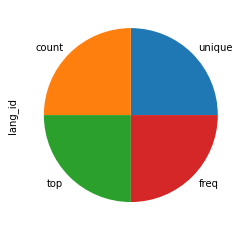

In [134]:
df = pd.DataFrame({"lang_id": ["unique","count","top","freq"]})
df["lang_id"].value_counts().plot.pie()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'xho'),
  Text(1, 0, 'eng'),
  Text(2, 0, 'nso'),
  Text(3, 0, 'ven'),
  Text(4, 0, 'tsn'),
  Text(5, 0, 'nbl'),
  Text(6, 0, 'zul'),
  Text(7, 0, 'ssw'),
  Text(8, 0, 'tso'),
  Text(9, 0, 'sot'),
  Text(10, 0, 'afr')])

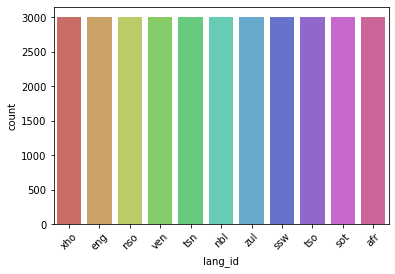

In [21]:
sns.countplot(x = 'lang_id', data = df2_train, palette="hls")
plt.xticks(rotation=45)

# Modeling

In [127]:
#Splitting features and target variables
X = df2_train['text']
y = df2_train['lang_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 8)

In [128]:
tfidf = TfidfVectorizer() #Call the TFidfVectorizer
cf= CountVectorizer() #Call the CountVectorizer

# RandomForestClassifier

Random Forest Classifier
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png">



The general idea of the Random Forest model is that a combination of machine learning models increase the overall result. Put simply: random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction (e.g in the image above).



In [129]:
rf = RandomForestClassifier(max_depth=5, n_estimators=100)
clf_rf = Pipeline([('tfidf', tfidf), ('clf', rf)])
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred_rf, y_test)) #Print the accuracy
print('f1_score %s' % metrics.f1_score(y_test,y_pred_rf,average='weighted')) #Print the f1 score
print(classification_report(y_test, y_pred_rf)) #Print out the classification

accuracy 0.8924242424242425
f1_score 0.8919322121212794
              precision    recall  f1-score   support

         afr       0.99      1.00      1.00       304
         eng       0.97      1.00      0.98       297
         nbl       0.60      0.82      0.69       299
         nso       0.97      0.97      0.97       293
         sot       0.96      0.98      0.97       292
         ssw       0.73      0.73      0.73       315
         tsn       0.95      0.93      0.94       268
         tso       0.98      1.00      0.99       291
         ven       0.99      1.00      0.99       296
         xho       0.86      0.87      0.86       301
         zul       0.94      0.59      0.72       344

    accuracy                           0.89      3300
   macro avg       0.90      0.90      0.90      3300
weighted avg       0.90      0.89      0.89      3300



## Logistic Regression

Logistic regression models a relationship between predictor variables and a categorical response variable. For example, we could use logistic regression to model the relationship between various measurements of a manufactured specimen (such as dimensions and chemical composition) to predict if a crack greater than 10 mils will occur (a binary variable: either yes or no). Logistic regression helps us estimate a probability of falling into a certain level of the categorical response given a set of predictors. We can choose from three types of logistic regression, depending on the nature of the categorical response variable:



In [130]:
lr = LogisticRegression(C=1, class_weight='balanced', max_iter=1000)
# call the model
clf_lr = Pipeline([('tfidf', tfidf), ('clf', lr)]) #Create a pipeline
clf_lr.fit(X_train, y_train) #Fit the training data to the pipeline
y_pred_lr= clf_lr.predict(X_test)#Make predictions
print('accuracy %s' % accuracy_score(y_pred_lr, y_test)) #Print the accuracy
print('f1_score %s' % metrics.f1_score(y_test,y_pred_lr,average='weighted')) #Print the weighted f1 score
print(classification_report(y_test, y_pred_lr)) #Classification

accuracy 0.9963636363636363
f1_score 0.9963636226478042
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       304
         eng       1.00      1.00      1.00       297
         nbl       1.00      0.98      0.99       299
         nso       1.00      0.99      0.99       293
         sot       1.00      1.00      1.00       292
         ssw       1.00      0.99      1.00       315
         tsn       1.00      1.00      1.00       268
         tso       1.00      1.00      1.00       291
         ven       1.00      1.00      1.00       296
         xho       0.98      1.00      0.99       301
         zul       0.99      0.99      0.99       344

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



### Model Parameter Tuning

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

The same kind of machine learning model can require different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem.

In [131]:
#MultinomialNB Hyperparameter tuning
tfid = TfidfVectorizer()
text = tfid.fit_transform(df2_train['text'])
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(text,y, test_size = 0.1, random_state = 8)
params = {'alpha':[1,0.1,0.01,5,10]}

grid_MNB = GridSearchCV(MultinomialNB(), params)
grid_MNB.fit(X_train_h, y_train_h)
print(grid_MNB.best_params_)

{'alpha': 0.1}


In [132]:
multi = Pipeline([('tfid', TfidfVectorizer()),
             ('clf', MultinomialNB(alpha = 0.1))])
multi.fit(X_train, y_train)
t = df1_test['text']
y_pred_m = multi.predict(t)
sub = pd.DataFrame( data = {'index': df1_test['index'],
                             'lang_id': y_pred_m })
sub.to_csv('submission_m.csv', index = False)
print('accuracy %s' % accuracy_score(y_pred_nb, y_test)) #Print the accuracy
print('f1_score %s' % metrics.f1_score(y_test,y_pred_nb,average='weighted')) #Print the f1 score
print(classification_report(y_test, y_pred_nb)) #Print out the classification

accuracy 0.08969696969696969
f1_score 0.0900709826169756
              precision    recall  f1-score   support

         afr       0.09      0.09      0.09       304
         eng       0.09      0.10      0.10       297
         nbl       0.08      0.08      0.08       299
         nso       0.10      0.10      0.10       293
         sot       0.06      0.07      0.06       292
         ssw       0.09      0.09      0.09       315
         tsn       0.08      0.09      0.08       268
         tso       0.06      0.06      0.06       291
         ven       0.09      0.09      0.09       296
         xho       0.12      0.12      0.12       301
         zul       0.13      0.11      0.12       344

    accuracy                           0.09      3300
   macro avg       0.09      0.09      0.09      3300
weighted avg       0.09      0.09      0.09      3300



In [76]:
# Make Submission
Submission = pd.DataFrame(df1_test['index'])
Submission['lang_id'] = multi.predict(df1_test['text'])
Submission.to_csv('Bethuel_Masango',index=False)